# 머신러닝
### 머신러닝이란?
- 데이터(과거)를 기반으로 학습을 시켜 예측(미래)을 수행하는 기법
  (인간의 학습능력을 모방)
- 통계학, 데이터마이닝, 컴퓨터비전이 어우러진 분야
    - 통계학 : 확률
    - 데이터마이닝 : 데이터 속에서 유효한 인사이트를 찾는 것
    - 컴퓨터비전 : 이미지



- 문제 데이터 : X, 특성, 독립변수 ...
- 정답 데이터 : Y, 라벨, 타겟, 종속변수...

### 머신러닝 종류
1. 지도학습(Supervised Learning)
- 데이터에 대한 Label(정답)이 주어진 상태에서 컴퓨터를 학습시키는 방법
- 예측하려는 값이 어떤지에 따라 분류와 회귀로 나뉨
    - 분류(Classification) : 예측하려는 값이 범주형 데이터인 경우
        - 스팸메일 분류, 성별 분류 등...
    - 회귀(Regression) : 예측하려는 값이 연속형 데이터인 경우
        - 주식 예측, 집 가격 예측 등...

2. 비지도학습(Unsupervised Learning)
- 데이터에 대한 Label(정답)이 없는 상태에서 컴퓨터를 학습시키는 방법
- 데이터의 숨겨진 특성, 구조, 패턴을 파악하는 데 활용
    - 클러스터링(Clustering / 군집화), 차원축소(Dimensionality Reduction) 등

3. 강화학습(Reinforcement Learning)
- 지도학습과 유사하나, 완전한 답(Lable)을 제공하지 않음
- 더 많은 보상을 얻을 수 있는 방향으로 행동을 학습
- 주로 게임이나 로봇을 학습시키는 데 많이 사용  

### 머신러닝 프로세스
★ 컴퓨터는 숫자만 이해 → 텍스트의 경우 임베딩 작업 필요
1. 문제 정의 → 예측하려는 값을 정의(가능하면 구체적으로)
    - 현재 필요한 솔루션의 구성 파악
    - 지도, 비지도, 강화 선택
    - 지도학습을 선택한 경우 → 분류, 회귀 선택
2. 데이터(과거) 수집
    - File, Database, Web Crawler, IoT 센서, 설문조사, API 등...
3. EDA(탐색적 데이터 분석) - 3,4단계의 순서는 상관 없음
    - 분석적 접근, 기술통계를 통한 상관관계 파악, 그래프 확인 등...
    - 시각화
4. 데이터 전처리
    1) 결측치 제거 및 대체
    2) 이상치 제거 및 대체
    3) 변수(x데이터) 처리
        - 불필요 시 컬럼 제거, 필요 시 파생변수 추가, 인코딩(범주형 → 수치형) 등
    4) (모델링을 위해) 데이터 분리
        - 모델링 시에만 진행
        - 7(학습용 데이터, train set) : 3(평가용 데이터, test set → 정확도 확인 할 수 있음)

---------- 모델 학습 시작(모델링)

5. Model 선택 및 Hyper Parameter(셋팅값)
    - 최적의 모델 선택 및 최적의 Hyper Parameter 선택
6. Model 학습(Training)
    - fit() : 모델 학습하는 함수
7. Model 평가(Evaluation)
    - score() : 평가하는 함수
    - 분류와 회귀의 평가지표는 서로 상이!!    

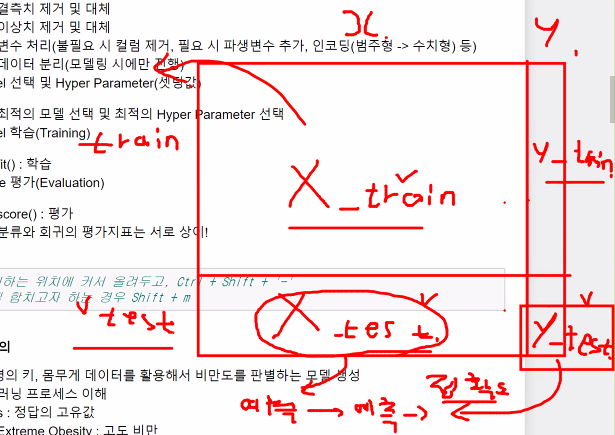

x:문제, y:정답
정확도가 평가지표가 됨     

In [1]:
# 셀 쪼갤 때는 원하는 위치에 커서 올려두고, Ctrl + Shift + '-'
# 셀 합치고자 하는 경우 Shift 누른 상태로 셀 다중 선택한 후 Shift + m

#### 1. 문제 정의
- 500명의 키, 몸무게 데이터를 활용하여 비만도를 판별하는 모델 생성
- 머신러닝 프로세스 이해
- Class : 정답의 고유값
    - Extreme Obesity : 고도비만
    - Obesity : 비만
    - Overweight : 과체중
    - Normal : 정상
    - Weak : 저체중
    - Extremely Weak : 심한 저체중
- 다중분류 진행
    - 이진분류 : 2가지 클래스를 분류
    - 다중분류 : 3가지 이상의 클래스를 분류

#### 2. 데이터 수집

In [ ]:
# 라이브러리 안 불러와지면 사이킷런 설치 해야 함
!pip install sklearn

In [4]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# 머신러닝 패키지
from sklearn.neighbors import KNeighborsClassifier # KNN 분류모델
# 회귀모델인 경우 뒤에 Regresser / 분류모델은 Classifier
from sklearn.metrics import accuracy_score # 정확도 측정도구   

In [5]:
import sklearn
# dir() : 구조 살펴보는 함수
dir(sklearn)

['__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_distributor_init',
 '_loss',
 'base',
 'clone',
 'config_context',
 'decomposition',
 'exceptions',
 'externals',
 'get_config',
 'linear_model',
 'logger',
 'logging',
 'metrics',
 'model_selection',
 'neighbors',
 'os',
 'preprocessing',
 'random',
 'set_config',
 'setup_module',
 'show_versions',
 'svm',
 'sys',
 'utils']

In [6]:
# 데이터 불러오기
# index_col = '컬럼명' : 컬럼을 index로 설정
# Label컬럼을 인덱스로
data = pd.read_csv("./data/bmi_500.csv", index_col="Label")
data

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


#### 3. EDA

#### 4. 데이터 전처리

In [7]:
# 가장 많은 시간 할애(데이터 노이즈 삭제)

# 정보 축약해서 보여주는 함수
data.info()
# DataFrame 의 정보 확인
# 전체 행의 개수, 열의 개수나 컬럼 정보
# 결측치 여부를 바로 파악할 수 있음
# 현재 데이터에는 결측치 없음!

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [ ]:
# 사분위 수
#: 데이터의 분포를 작은 수부터 큰 수로 오름차순으로 나열하여 4등분한 결과값

# 25% = Q1 : 제 1사분위수
# 50% = Q2 : 제2 사분위수, 중앙값
# 75% = Q3 : 제 3사분위수
# 100% = Q4 : 제 4사문위수, max

# 평균, 중앙값, 최빈값
# 수치 데이터 : 평균, 중앙값
# 문자 데이터 : 최빈값

In [9]:
# 통계값 한 눈에 볼 수 있는 함수
# 기술통계 : 평균값, 중간값, 최근값 등
# 기술통계량 확인하는 함수
data.describe().T # 수치 데이터에 대해서만 출력, 수치데이터들의 요약본
#count 수, mean 평균, std 표준편차,

# 추론통계 : 

,count,mean,std,min,25%,50%,75%,max
Height,500.0,169.944,16.375261,140.0,156.0,170.5,184.0,199.0
Weight,500.0,106.000,32.382607,50.0,80.0,106.0,136.0,160.0


In [10]:
# describe 함수의 경우 수치데이터에 대한 요약본을 제공함
# include 속성을 통해 object를 설정해 주면 문자 데이터에 대한 요약본 확인 가능
data.describe(include='object').T

# unique : 클래스의 고유값 개수
# top : 클래스 중 가장 많은 값
# freq : 최빈값, 가장 많은 클래스가 몇 개 있는지

,count,unique,top,freq
Gender,500,2,Female,255


In [11]:
# 데이터 분포 시각화
# 정답데이터에 대한 클래스 값 확인
data.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [14]:
# 시각화(bmi 클래스별로 분포 현황 시각화)
# 산점도(scatter)
# 고도비만(Extreme Obesity)
EO = data.loc["Extreme Obesity"] # loc : 인덱서
EO

,Gender,Height,Weight
Label,,,
Extreme Obesity,Male,147,92
Extreme Obesity,Male,154,111
Extreme Obesity,Female,153,107
Extreme Obesity,Female,157,110
Extreme Obesity,Male,140,129
...,...,...,...
Extreme Obesity,Male,152,98
Extreme Obesity,Female,150,153
Extreme Obesity,Female,141,136


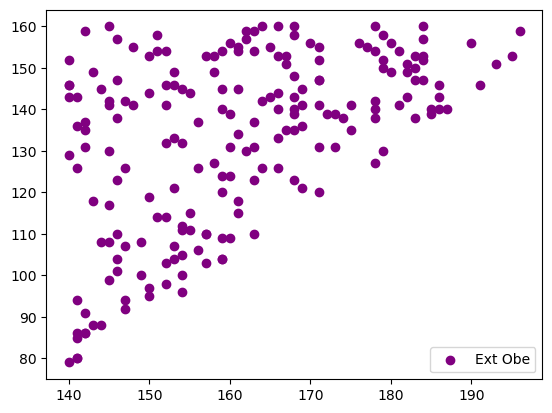

In [19]:
# 고도비만 산점도
#scatter(x축, y축)
plt.scatter(EO["Height"], EO["Weight"], color="purple", label="Ext Obe")
plt.legend()
plt.show()

In [7]:
# 산점도 함수화
def graph_draw(label, c):
    EO = data.loc[label]
    plt.scatter(EO["Height"], EO["Weight"], color=c, label=label)

In [10]:
# enumerate() : 인덱스 번호와 value을 동시에 추출
for i in enumerate(data.index.unique()):
    print(i)

(0, 'Obesity')
(1, 'Normal')
(2, 'Overweight')
(3, 'Extreme Obesity')
(4, 'Weak')
(5, 'Extremely Weak')


순서대로 정의
1. Extreme Obesity : 고도비만
2. Obesity : 비만
3. Overweight : 과체중
4. Normal : 정상
5. Weak : 저체중
6. Extremely Weak : 심한 저체중

In [12]:
# 각 라벨에 따른 색상 지정
c_list = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

# index.unique()값이 정렬이 안되어있어서, 직접 라벨 순서대로 작성
label_list = ["Extreme Obesity", "Obesity", "Overweight", "Normal", "Weak", "Extremely Weak"]

for i, label in enumerate(label_list):
    print(i)
    print(label)

0
Extreme Obesity
1
Obesity
2
Overweight
3
Normal
4
Weak
5
Extremely Weak


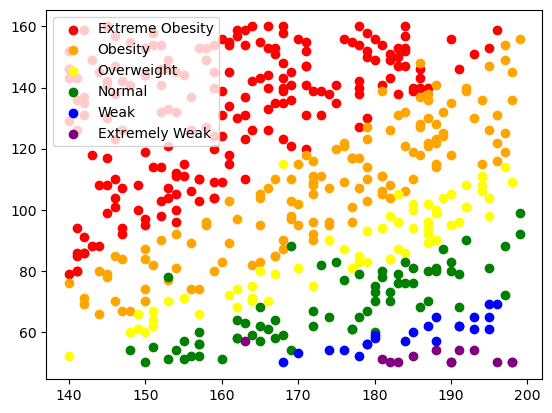

In [14]:
# 함수 호출
for i, label in enumerate(label_list):
    graph_draw(label, c_list[i])
    
plt.legend()
plt.show()

In [15]:
data
# label : y - 종속변수
# gender, heigth, weight : x - 독립변수

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


- 데이터 분리
     - 문제 데이터(X, 2차원) : Height, Weight
     - 정답 데이터(y, 1차원) : Label   

In [20]:
# 다중 인덱싱 활용해서 Height, Weight 지정
X = data[['Height','Weight']]
X

,Height,Weight
Label,,
Obesity,174,96
Normal,189,87
Obesity,185,110
Overweight,195,104
Overweight,149,61
...,...,...
Extreme Obesity,150,153
Obesity,184,121
Extreme Obesity,141,136


In [21]:
# 정답 데이터
y = data.index
y

Index(['Obesity', 'Normal', 'Obesity', 'Overweight', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Obesity',
       ...
       'Normal', 'Extreme Obesity', 'Extremely Weak', 'Weak',
       'Extreme Obesity', 'Extreme Obesity', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity'],
      dtype='object', name='Label', length=500)

In [25]:
# train, test 분리
# 한정적인 데이터 내에서 학습하고 평가까지 해야하기 때문에 분리!!

# 훈련용 데이터셋 : 500ea 70% → 350ea
data.shape # (500,3)
X_train = X.iloc[:350]
y_train = y[:350]

# 테스트용 데이터셋 : 500ea 30% → 150ea
X_test = X.iloc[350:]
y_test = y[350:]

In [26]:
# 문제(X)와 정답(y) 데이터 개수가 동일한지 확인!!!
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((350, 2), (350,), (150, 2), (150,))

#### 5. 모델선택 및 하이퍼파라미터 조정

#### 6. 모델 학습

In [27]:
# 모델 생성(초기화)
knn_model = KNeighborsClassifier()
knn_model

KNeighborsClassifier()

In [28]:
# 모델학습
# 모델이름.fit(학습용 문제, 학습용 답)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
# 모델 예측
# 모델이름.predict(테스트용 문제)
pred = knn_model.predict(X_test)
pred

# 예측한 y값이 나옴

array(['Overweight', 'Normal', 'Normal', 'Extreme Obesity',
       'Extremely Weak', 'Obesity', 'Obesity', 'Extreme Obesity', 'Weak',
       'Extreme Obesity', 'Weak', 'Extreme Obesity', 'Extreme Obesity',
       'Obesity', 'Extreme Obesity', 'Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Normal', 'Normal',
       'Normal', 'Normal', 'Overweight', 'Extreme Obesity', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Obesity', 'Normal', 'Obesity', 'Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme

#### 7. 모델 평가  

In [31]:
# 1. 모델 자체에서 제공하는 평가 함수 활용 → 예측값(pred) 따로 필요 없음
# 정확도 하나만 제공
knn_model.score(X_test, y_test) # 정확도 : 90.67%

0.9066666666666666

In [32]:
# metrics 활용 → pred 필요
# metrics내에 여러개의 평가 지표가 존재
# accuracy_score(실제값, 예상값) : 여러 평가지표 중 정확도를 확인하는 것

accuracy_score(y_test, pred) # 정확도 : 90.67%

0.9066666666666666